In [111]:
import warnings
warnings.filterwarnings("ignore")
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from numpy import random



In [112]:
from sklearn.datasets import load_boston
boston = load_boston()

In [113]:
print(boston.data.shape)

(506, 13)


In [114]:
print(boston.target.shape)

(506,)


In [115]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [116]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [117]:
boston_data=pd.DataFrame(boston.data,columns=load_boston().feature_names)

In [118]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [119]:
df = boston.data

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(df)


In [121]:
new_features = np.ones(boston.data.shape[0])
features = np.vstack((new_features,standardized_data.T)).T

In [122]:
target_price = boston.target

In [123]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(features,target_price,test_size = 0.33,random_state = 5)



# sklearn_sgd_implementation

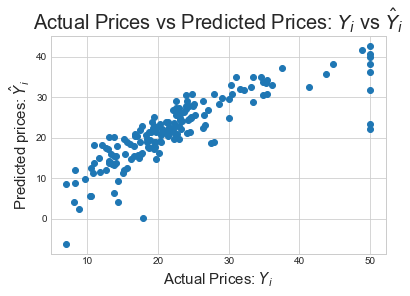

In [124]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )
sgd.fit(X_train, y_train)

sklearn_sgd_predictions = sgd.predict(x_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=15)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=15)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=20)
plt.show()

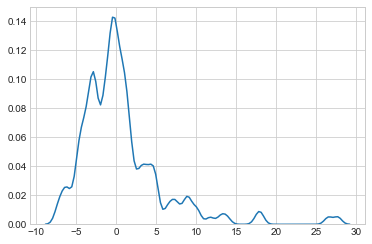

In [125]:
fy = y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(fy), bw=0.5)
plt.show()

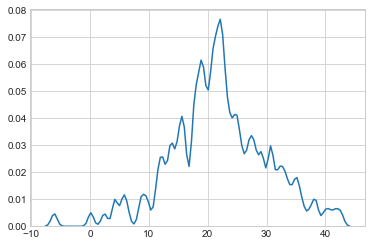

In [126]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [127]:
# Calculating accuracy of SGD using sklearn
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print(mean_absolute_error(y_test,sklearn_sgd_predictions))
print(mean_squared_error(y_test, sklearn_sgd_predictions))
print(np.sqrt(mean_squared_error(y_test,sklearn_sgd_predictions)))

3.459556761699631
28.476769979474394
5.33636299172708


# manual_sgd_implementation

In [128]:
#https://media.geeksforgeeks.org/wp-content/uploads/gradiant_descent.jpg

In [129]:
#https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/

# Stochastic Gradient Descent Algorithm :

# Let 'K' be the number of random rows selected out of the dataset
# Initialize the weight vector
#Let r = learning_rate and m = number of training_examples
# Let r =1
# repeat until convergence {
#    weight[j] = weight[j] - (r/m)*((Σfrom i=1 to K)of(((weight.T * feature_data[i]) - target_price[i])* feature_data[i,j])
#    r /= 2  
#}

# Final hypothesis for linear regression
# predicted_prices = (final_weights.T)*(test_data_matrix)


In [130]:
#initializing weights vectors

w = np.random.normal(0,1,features.shape[1])
w

array([-0.04178054,  0.21295249,  0.364612  , -1.46012581, -0.83815318,
       -0.35844214, -0.42165175,  0.08965714, -0.1998211 , -0.09961203,
        0.62951439, -0.099141  ,  1.79061801,  0.31543617])

In [131]:
#creating a temporary weight vector to storing the intermidiate computed weight values

temp_v = np.zeros(features.shape[1])

In [132]:
#initializing the learning rate
rate = 0.001
n_train = X_train.shape[0]


In [133]:
#batch size for gradient_descent

batch_size = 20
from numpy import random
random_i = random.choice(n_train,n_train,replace=False)
x_shuffled = X_train[random_i,:]
y_shuffled = y_train[random_i]
mini_batches = [(x_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, n_train, batch_size)]

In [134]:
iterations = 1000 # iteration for training data

In [135]:
#stockastic_gradient_descent
while(iterations > 0 ):
    for batch in mini_batches:
        x_batch = batch[0]
        y_batch = batch[1]
        for j in range(0,features.shape[1]):
            temp_sum = 0
            for i in range(0,x_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(w[1:14] * x_batch[i,1:])) + w[0]*x_batch[i,0]) - y_batch[i]) * x_batch[i,j])
            temp_v[j] = w[j] - ((rate/x_batch.shape[0])*temp_sum)
        w = temp_v
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = w
    

In [136]:
# Now predicting the house prices on x_test data
manual_sgd_predictions = np.zeros(x_test.shape[0])
for i in range(0,x_test.shape[0]):
    manual_sgd_predictions[i] = np.sum(sc.inverse_transform(w[1:14]*x_test[i,1:])) + w[0]*x_test[i,0]

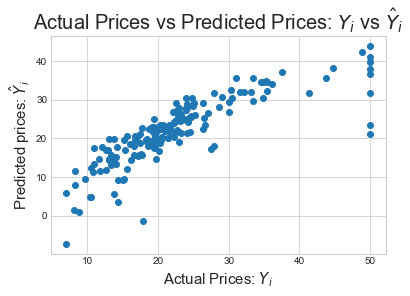

In [137]:
#scatter_plot for actual_price vs predicted_price

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, manual_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=15)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=15)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=20)
plt.show()

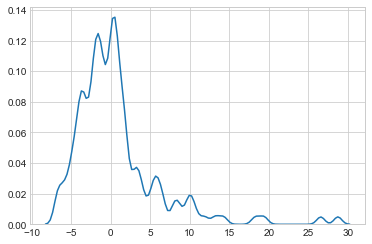

In [138]:
fy = y_test - manual_sgd_predictions;
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(fy), bw=0.5)
plt.show()

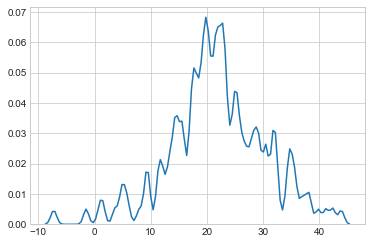

In [139]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)
plt.show()

In [140]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print(mean_absolute_error(y_test, manual_sgd_predictions))
print(mean_squared_error(y_test, manual_sgd_predictions))
print(np.sqrt(mean_squared_error(y_test,manual_sgd_predictions)))

3.5174970474311973
29.83399657408489
5.462050583259449


# Results comparison of manual_sgd and sklean_sgd

In [141]:
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Initializing prettytable
table = PrettyTable()

# Adding columns
table.add_column("S.no.",numbering)
table.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)
table.add_column("Weights of Manual SGD",manual_sgd_weights)
print(table)

+-------+--------------------------+-----------------------+
| S.no. | Weights of Sklearn's SGD | Weights of Manual SGD |
+-------+--------------------------+-----------------------+
|   1   |    11.171987537549956    |   -888.6595983829926  |
|   2   |    -1.279700072646803    |  -0.16011812289540817 |
|   3   |    0.7894394794215622    |  0.04114444689661235  |
|   4   |   -0.42368089087640315   |  -0.06764978034840359 |
|   5   |   0.24184463443991208    |   1.6253128376897086  |
|   6   |    -1.370485009260177    |   -4.191761693921897  |
|   7   |    2.875644594386829     |   4.155374713308406   |
|   8   |   -0.3721401278535712    | -0.021804811020539785 |
|   9   |   -2.8631224110918523    |  -1.2281401833727539  |
|   10  |    2.1335087837165996    |   0.3094725189579569  |
|   11  |   -1.3893128036801325    | -0.015198288531831536 |
|   12  |   -2.1239405739498816    |  -0.8878123611969337  |
|   13  |    1.089839656001719     |  0.012528838090981752 |
|   14  |   -3.343869923